# Trabajo Final de la Asignatura Aprendizaje Máquina.
## Trabajo A-Conjunto de datos 3.
### Autores: María Bellver Carrasco y Alejandro Sanz Sánchez.

## Índice
**0- Carga de librerías y datos.<br>**

**1- Resolución no supervisada:Clustering y reconocimiento de posibles de patrones en los datos sin etiquedas.<br>**
**&nbsp;&nbsp; 1.1- Métodos K-Means.<br>**
**&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 1.1.1- Determinación de número óptimo de clusters: Metodo Elbow.<br>**
**&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 1.1.2- Obtencción de plot de siluetas y valores de Homogeniedad, Completitud y V-Measure.<br>**
**&nbsp;&nbsp; 1.2- Métodos de agrupamiento jerárquico.Dendograma.<br>**

**2- Selección del conjunto para el aprendizaje supervisado.<br>**

**3- Aprendizaje supervisado.<br>**
**&nbsp;&nbsp; 3.1- C-Support Vector Classification. <br>**
**&nbsp;&nbsp; 3.2- Árbol de decisión.<br>**

**4- Selección de características.<br>**

**5- Métodos ensemble.<br>**
**&nbsp;&nbsp; 5.1- Random Forest.<br>**
**&nbsp;&nbsp; 5.2- Bagging.<br>**
    

## 0.Carga de librerías y datos

Cargamos los modulos que emplearemos a lo largo del trabajo.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn import metrics
from scipy.spatial.distance import cdist
from sklearn.cluster import AgglomerativeClustering, KMeans
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import homogeneity_completeness_v_measure, cohen_kappa_score, silhouette_samples, silhouette_score
from sklearn.mixture import GaussianMixture
from scipy.stats import multivariate_normal, describe
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from collections import Counter, defaultdict

Cargamos los datos:

In [2]:
# Read text file and suppress last (void) column
data = np.genfromtxt('.\\cdata3.txt', delimiter = '\t')
data = data[:,:-1]  
#print(data.shape)

# Read text file and suppress last (void) column
labs = np.genfromtxt('clabs3.txt', delimiter = '\t')

labs = labs[:,:-1]
labs = labs.astype(int)
labs = labs - labs.min() # start labels at zero
#print(labs.shape)

# size, number of features ...
n,d = data.shape

# ... and the number of classes
c=len(np.unique(labs))

print("Conjunto de datos de tamaño ",n,", ",d," atributos y ",c," clases\n")

Conjunto de datos de tamaño  39583 ,  400  atributos y  2  clases



## 1.Resolución no supervisada: Clustering y reconocimiento de posibles de patrones en los datos sin etiquedas.

**Usar algún algoritmo de clustering sobre todos los datos sin emplear las etiquetas para obtener una primera clasificación.
El objetivo consiste en descubrir posibles patrones en los datos y hasta qué punto estos son compatibles con las etiquetas.**

En primer lugar, aplicamos el método de clustering k-means. Empleando dicho método de clustering aplicamos el método de Elbow para encontrar el número óptimo de agrupaciones que podemos encontrar en nuestro conjunto de datos.
Nota:No se recomienda la ejecución de nuevo de este fragmento de codigo, debido al largo tiempo de computacion del mismo ~30 min.

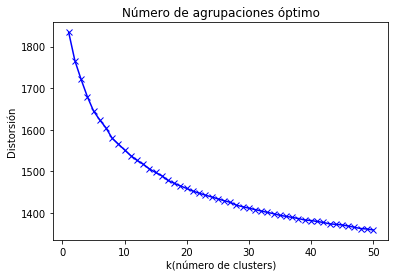

In [20]:
distortions = []
K = range(1,51) #Realizaremos hasta un total de 50 clusters.
for k in K:
    kmeanModel = KMeans(n_clusters=k,n_jobs=-1).fit(data)
    kmeanModel.fit(data)
    distortions.append(sum(np.min(cdist(data, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / data.shape[0])

# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k(número de clusters)')
plt.ylabel('Distorsión')
plt.title('Número de agrupaciones óptimo')
plt.show()



Mirando la gráfica no podemos observar una doblez, es decir, el llamado codo. Por lo tanto , lo que nos puede estar sugiriendo es que en nuestros datos no se puede realizar ningún tipo de agrupación.

Con el fin de confirmar este resultado vamos a aplicar dicho método de clustering considerando 2,3,6,10 y 20 agrupaciones distintas. Visualizaremos el resultado mediante las gráficas de silueta, de la misma forma también obtendremos los valores de homogeneidad, completitud y V-Measure, para los distintos tipos de agrupaciones. 

Para n_clusters = 2 El valor medio de el score de silueta es : 0.08784651740886236


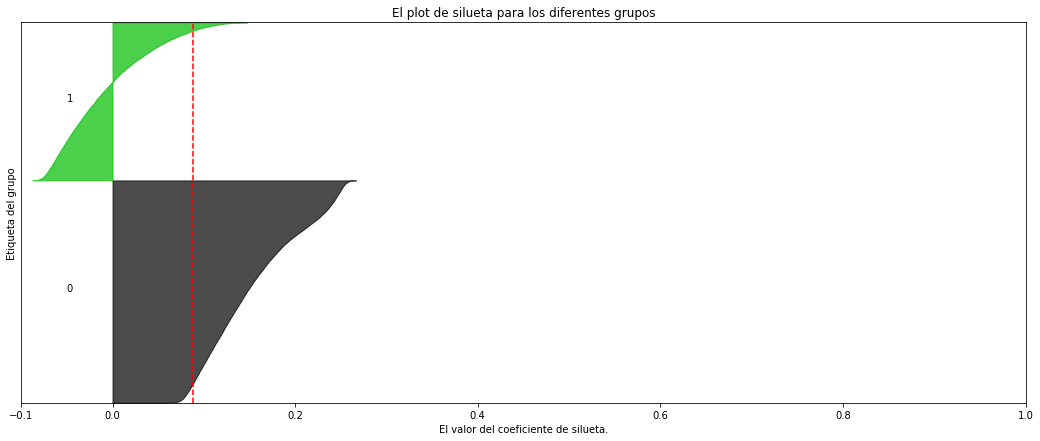

2  agrupaciones, homogeneidad:  0.01590629663960626
2  agrupaciones, completitud:  0.016242234341617603
2  agrupaciones, V-measure:  0.016072510291599906 

Para n_clusters = 3 El valor medio de el score de silueta es : 0.059707082435569


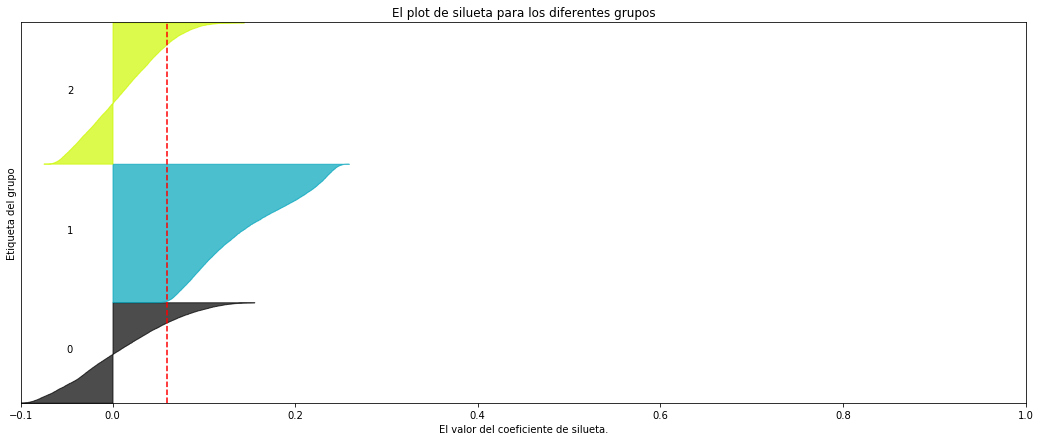

3  agrupaciones, homogeneidad:  0.08019227980947234
3  agrupaciones, completitud:  0.05111130165950911
3  agrupaciones, V-measure:  0.06243137861512128 

Para n_clusters = 6 El valor medio de el score de silueta es : 0.07185267352012584


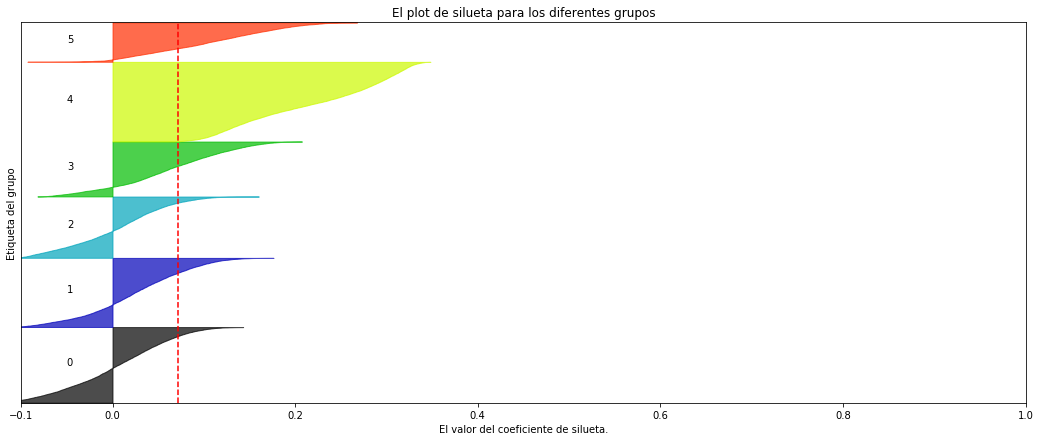

6  agrupaciones, homogeneidad:  0.2624048791487884
6  agrupaciones, completitud:  0.10288603328401849
6  agrupaciones, V-measure:  0.14781532313622603 

Para n_clusters = 10 El valor medio de el score de silueta es : 0.061093092294059834


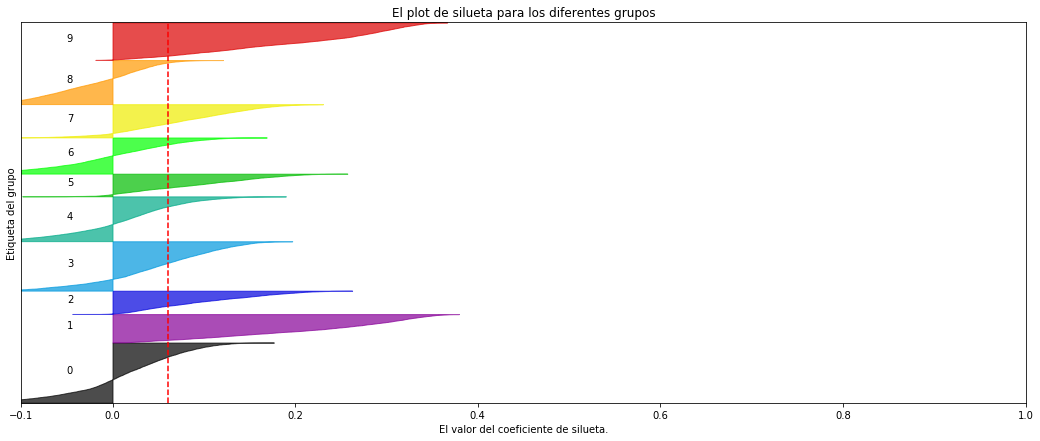

10  agrupaciones, homogeneidad:  0.43067427222114324
10  agrupaciones, completitud:  0.13216255735344692
10  agrupaciones, V-measure:  0.20225760011512411 

Para n_clusters = 20 El valor medio de el score de silueta es : 0.06302943751136299


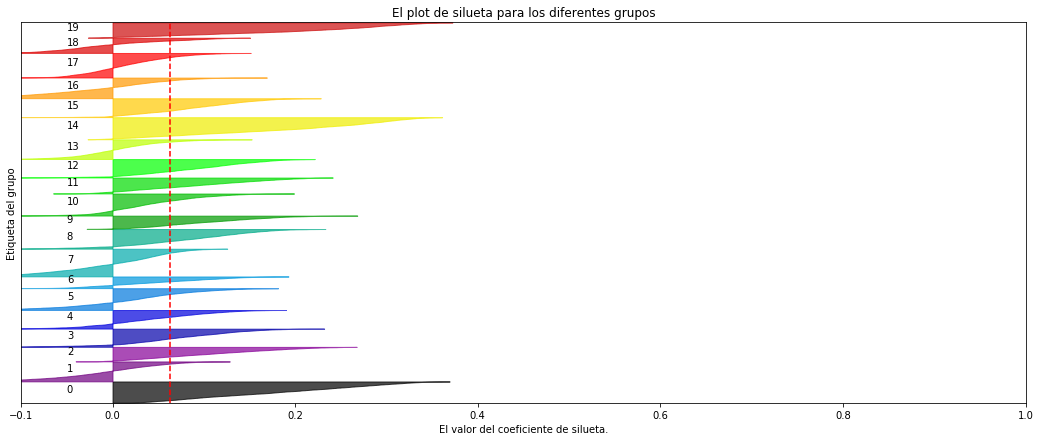

20  agrupaciones, homogeneidad:  0.5794075142277375
20  agrupaciones, completitud:  0.13495826545635345
20  agrupaciones, V-measure:  0.21892379320614402 



In [22]:
#APLICANDO KMEANS.
range_n_clusters = [2,3,6,10,20] #Definimos el numero de diferentes tipos de clusters.


for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 1 columns
    fig, ax1 = plt.subplots(1, 1)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(data) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clustererKmeans = KMeans(n_clusters=n_clusters)
    cluster_labels_kmeans = clustererKmeans.fit_predict(data)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(data, cluster_labels_kmeans)
    print("Para n_clusters =", n_clusters,
          "El valor medio de el score de silueta es :", silhouette_avg)
    
     # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(data, cluster_labels_kmeans)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels_kmeans == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("El plot de silueta para los diferentes grupos")
    ax1.set_xlabel("El valor del coeficiente de silueta.")
    ax1.set_ylabel("Etiqueta del grupo")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
    
    plt.show()
    test = homogeneity_completeness_v_measure(labs[:,0],cluster_labels_kmeans)
    print( n_clusters,' agrupaciones, homogeneidad: ', test[0])
    print(n_clusters,' agrupaciones, completitud: ', test[1])
    print(n_clusters,' agrupaciones, V-measure: ', test[2],'\n')

Observamos que todos los scores de silueta para las distintas agrupaciones que hemos realizado son muy cercanos a cero, por lo que no se puede distinguir las fronteras de decisión. Por otra parte, según aumentamos el número de agrupaciones obtenemos un valor superior en la v-measure, es decir, la completitud y la homegeneidad en nuestro caso es mejor para 20 agrupaciones, no obstante este valor no sobrepasa a 0.25 en ninguno de los casos considerados.

Aunque en el caso de 2 agrupaciones se observa que uno de los grupos esta bien diferenciado el otro no. A raiz de esto no tenemos criterio para decir cuantas agrupaciones tienen nuestros datos.


Vamos, ahora, a emplear otro método de clustering, concretamente el método jerarquico aglomerativo y realizaremos un dendograma para visualizar el resultado.

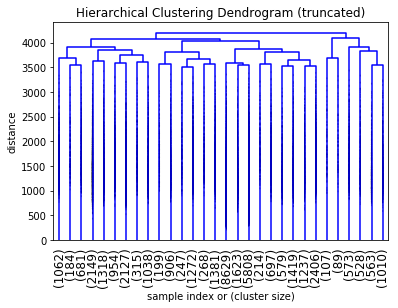

In [23]:
plt.title('Hierarchical Clustering Dendrogram (truncated)')
plt.xlabel('sample index or (cluster size)')
plt.ylabel('distance')
Z = linkage(data,method = 'complete')
dendrogram(
    Z,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=30,  # show only the last p merged clusters
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,  # to get a distribution impression in truncated branches
)
plt.show()

Vemos claramente que tenemos 2 agrupaciones principales, una a la izquerda que engloba la gran mayoría de los datos de nuestro conjunto y otro a la derecha con los demás datos.

A la vista de los resultados obtenidos con los diversos procedimientos utilizados concluimos que tenemos una agrupación que contiene la mayor parte de los datos y los restantes estarán distribuidos alrededor a cierta distancia de la agrupación principal dando lugar a una segunda agupación.

## 2. Selección del conjunto para el aprendizaje supervisado.
    
**Para aplicar algoritmos de aprendizaje supervisado usaremos un subconjunto reducido al 30% con sus etiquetas de clase.
Sin embargo, la selección de estas muestras no la vamos a hacer de forma aleatoria sino que vamos a emplear algoritmos de
clustering para reducir el número de muestras pero preservando la distribución de los datos de entrada y de las clases definidas.
Primero, separar los datos en función de su etiqueta de clase. En cada subconjunto, aplicar algún algoritmo de clustering y
definir una estrategia para obtener un subconjunto reducido que sea representativo del conjunto inicial.**


Primero definimos la función que dados un porcentaje y un conjunto de datos realiza una selección de una muestra del porcentaje de datos dado de dicho conjunto. Después, para los conjuntos de datos correspondientes a cada etiqueta que se nos han proporcionado aplicaremos la función de selección con un porcentaje del 30%. Una vez obtenida la selección del subconjunto para cada etiqueta, se unirán estos dos subconjuntos formando el subconjunto final, el cual será resultado de seleccionar el 30% de los datos del conjunto de datos original. Finalmente, a este subconjunto se le asociarán las correspondientes etiquetas.


La estrategia utilizada para realizar la selección del 30% de los datos originales esta basada en métodos de clustering:

1. Se aplica el método k-means para realizar tantas agrupaciones del conjunto original como le indiquemos. Empleamos dicho algoritmo por su rapidez computacional.
2. Se calculan las distancias de los datos a cada centroide.
3. Se selecciona el 30% de los datos de cada agrupación obteniendolos de forma que éstos sean los más cercanos al centroide.


Se ha considerado obtener 10 clusters ya que, después de varias comprobaciones, obteniamos un número representativo de registros del conjunto original, es decir, se nos repetía un porcentaje pequeño de registros y estamos considerando un número suficientemente grande de agrupaciones con el fin de que la muestra conserve la distribución del conjunto original.

In [3]:
def select(datas,num_clus,per):
#Aplicamos k-means con 30 agrupaciones:

    clustererKmeans = KMeans(n_clusters=num_clus)
    clustererKmeans.fit(datas)
    

    
    puntos=[]
    for j in np.arange(num_clus):
        d = clustererKmeans.transform(datas)[:, j] #Calculamos las ditancias de cada punto al centroide j.
        npuntos=Counter(clustererKmeans.labels_)[j]*per # Calculamos el número de puntos correspondiente al porcentaje que queremos obtener de cada agrupación.                                                                                                          
        ind = np.argsort(d)[:int(npuntos)] #Seleccionamos los índices de los npuntos más cercanos.
        puntos.extend(datas[ind]) #Guardamos los puntos del conjunto inicial correspondientes a los índices seleccionados.
        np.delete(datas,ind,0) #Borramos los indices correspondientes a los datos ya seleccionados.
        
    puntos=np.array(puntos)  
    
    return puntos

In [4]:
clus1=data[(labs==0)[:,0],:]
clus2=data[(labs==1)[:,0],:]
sel1=select(clus1,10,0.3).flatten()
sel2=select(clus2,10,0.3).flatten()
sel1=sel1.reshape(int(len(sel1)/400),400)
sel2=sel2.reshape(int(len(sel2)/400),400)
data_sel_clus = np.vstack((sel1,sel2))
#unique_rows = np.unique(sel1, axis=0)
#len(unique_rows)

datoslalbsflat1=labs[(labs==0)[:,0],:].flatten() #seelccionamos las etiquetas del cluster 1
datosclus1_eti1=np.random.choice(datoslalbsflat1, len(sel1)).flatten()
                                 
datoslalbsflat2=labs[(labs==1)[:,0],:].flatten()
datosclus1_eti2=np.random.choice(datoslalbsflat2, len(sel2)).flatten()
                                 
data_sel_clus_et = np.concatenate((datosclus1_eti1,datosclus1_eti2)) #merger etiquetas
                                 
data_sel_clus_et=data_sel_clus_et.flatten() #aplastar etiquetas

Comprobamos si tenemos datos repetidos los registros seleccionados, ya que puede ocurrir que algunos de los datos sean cercanos a varios centroides y por lo tanto aparecer más de una vez en los datos que hemos seleccionado.

In [5]:
unique_rows = np.unique(data_sel_clus, axis=0)
nunicas,natribuni=unique_rows.shape
print("El conjunto de datos tiene ",nunicas,"datos únicos con",natribuni," atributos\n ")
datconj,colconj=data_sel_clus.shape
print("El conjunto de datos tiene un total de ",datconj," datos con",colconj," atributos\n ")


El conjunto de datos tiene  11675 datos únicos con 400  atributos
 
El conjunto de datos tiene un total de  11866  datos con 400  atributos
 


## 3.Aprendizaje supervisado.
**Utilizar algoritmos supervisados sobre el conjunto reducido de entrenamiento para obtener una clasificación de los datos. Se debe obtener una aproximación del error de clasificación en test utilizando una partición del conjunto de entrenamiento.**

Para utilizar métodos de aprendizaje supervisado dividiremos el conjunto obtenido en el apartado anterior en un conjunto de entrenamiento (70% datos) y un conjunto de test (40% datos).

In [6]:
#Separamos en conjunto de entrenamiento y de test.

X_train, X_test, y_train, y_test = train_test_split(data_sel_clus,data_sel_clus_et, test_size=.4)

Ahora, vamos a aplicar diferentes técnicas de aprendizaje supervisado. Por una parte vamos a emplear metodos kernel, concretamente el algoritmo C-Support Vector Classification y por otro lado haremos uso de arboles de clasificación utilizando el algoritmo DecisionTreeClassifier. Para aproximar el error de test calcularemos el score en el conjunto de entrenamiento y en el de test de cada uno de los métodos grafiando éstos para el árbol según su profundidad.

In [7]:
svc_clf = SVC(kernel='rbf',C=100)
svc_clf.fit(X_train,y_train)

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [8]:
print('Score (en train) de SVC rbf', svc_clf.score(X_train, y_train))
print('Score (en test) de SVC rbf', svc_clf.score(X_test, y_test))

Score (en train) de SVC rbf 1.0
Score (en test) de SVC rbf 0.5022119233199915


In [9]:
iter = np.arange(1, 50)
train_score = np.zeros(len(iter))
test_score = np.zeros(len(iter))

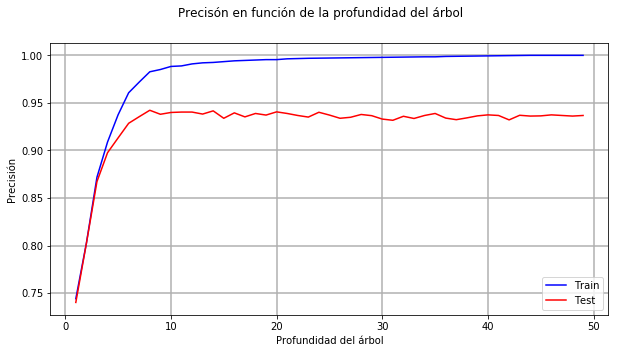

Score (train) de un sólo árbol con max_depth = 10:  0.9883410591375194
Score (test) de un sólo árbol con max_depth = 10:  0.9399620813145144


In [10]:
for i in iter:
    clf = DecisionTreeClassifier(criterion='gini', max_depth=i)
    clf.fit(X_train, y_train)

    train_score[i-1] = clf.score(X_train, y_train)
    test_score[i-1] = clf.score(X_test, y_test)

   

fig = plt.figure(figsize=(10,5))
grafica = fig.add_subplot(111)
grafica.plot(iter, train_score, c="b", label = "Train")
grafica.plot(iter, test_score, c="r", label = "Test")
grafica.legend(loc=4)
grafica.grid(b=True,linestyle='-',linewidth=1.5)
grafica.set_axisbelow(True)
plt.xlabel("Profundidad del árbol")
plt.ylabel("Precisión")
plt.suptitle("Precisón en función de la profundidad del árbol")
plt.show()
    
print('Score (train) de un sólo árbol con max_depth = 10: ', train_score[9])
print('Score (test) de un sólo árbol con max_depth = 10: ', test_score[9])

El C-SVM, con kernel RBF, unicamente nos clasifica la mitad de los valores del conjunto de test. Este tipo de algoritmo no funciona de forma óptima cuando tenemos clases superpuestas. Como en nuestro conjunto de datos intuimos que tenemos un único agrupamiento, las diferentes clases que busca el SVM estarían superpuestas y explicaría los resultados obtenidos.

En cambio, cuando se emplean arboles de clasificación podemos obsevar que para una profundidad de 10 nodos nuestro arbol es capaz de clasificar correctamente cerca del 95% de los datos de test, lo que nos indica que este procedimiento es adecuado a la hora de clasificar el conjunto de datos disponible.

## 4. Selección de características.
**Los registros pueden contener atributos con datos erróneos, o que tengan poca relevancia en el resultado de la clasificación. Utilizando métodos de clasificación que proporcionen un 'ranking' de características, intentar detectar y eliminar aquellas bandas que empeoran (o no mejoran) el resultado de la clasificación. De nuevo, dar un resultado cuantitativo del error en test, y cualitativo mediante la representación de mapas de clasificación.**

Del arbol de clasificación realizado anteriormente obtenemos las importancias de las características con el fin de seleccionar  aquellos datos que nos aporten mayor información a la hora de realizar la clasificación.

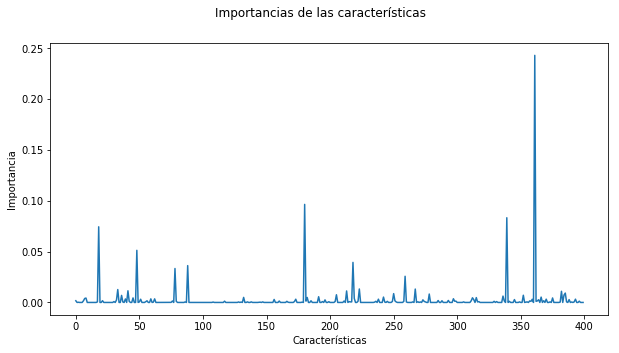

In [11]:
importances = clf.feature_importances_
fig = plt.figure(figsize=(10,5))
grafica = fig.add_subplot(111)
grafica.plot(np.arange(len(importances)),importances)
fig.suptitle('Importancias de las características')
plt.xlabel('Características')
plt.ylabel('Importancia')
plt.show()

In [12]:
imp_ordena = np.sort(importances)[::-1]
ind_imp_ordena = np.argsort(importances)[::-1]
ind_70_imp = ind_imp_ordena[np.cumsum(imp_ordena)<=0.7]

data_70_imp = data_sel_clus[:,ind_70_imp]
labs_70_imp = data_sel_clus_et



Una vez seleccionados los datos con mayor importancia, volvemos a aplicar un arbol de clasificación y comprobaremos si conseguimos resultados mejores que los obtenidos anteriormente.

In [13]:
#Obtenemos los nuevos conjuntos de train y test del conjunto de datos con las caracteristicas
# mas importantes del subjconjuento del 30% de los originales.
X_trainR, X_testR, y_trainR, y_testR = train_test_split(data_70_imp, labs_70_imp, test_size=.4)

In [14]:
svc_clf = SVC(kernel='rbf',C=100)
svc_clf.fit(X_trainR,y_trainR)

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [15]:
print('Score (en train) de SVC rbf', svc_clf.score(X_trainR, y_trainR))
print('Score (en test) de SVC rbf', svc_clf.score(X_testR, y_testR))

Score (en train) de SVC rbf 1.0
Score (en test) de SVC rbf 0.5038971982304613


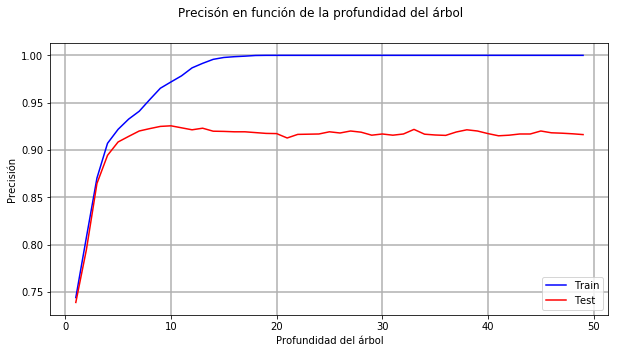

Score (train) de un sólo árbol con max_depth = 10:  0.971906166596432
Score (test) de un sólo árbol con max_depth = 10:  0.9256372445755214


In [16]:
iter = np.arange(1, 50)

train_score = np.zeros(len(iter))
test_score = np.zeros(len(iter))


for i in iter:
    clf = DecisionTreeClassifier(criterion='gini', max_depth=i)
    clf.fit(X_trainR, y_trainR)

    train_score[i-1] = clf.score(X_trainR, y_trainR)
    test_score[i-1] = clf.score(X_testR, y_testR)

   

fig = plt.figure(figsize=(10,5))
grafica = fig.add_subplot(111)
grafica.plot(iter, train_score, c="b", label = "Train")
grafica.plot(iter, test_score, c="r", label = "Test")
grafica.legend(loc=4)
grafica.grid(b=True,linestyle='-',linewidth=1.5)
grafica.set_axisbelow(True)
plt.xlabel("Profundidad del árbol")
plt.ylabel("Precisión")
plt.suptitle("Precisón en función de la profundidad del árbol")
plt.show()

print('Score (train) de un sólo árbol con max_depth = 10: ', train_score[9])
print('Score (test) de un sólo árbol con max_depth = 10: ', test_score[9])

Observamos que al quedarnos con los datos cuyas características son mas importantes el arbol de clasifiación tambien funciona de forma adecuada, no obstante da peores resultados que en el caso anterior. Esto posiblemente se deba al hecho de que al realizar la selección de caracterísitcas, se han eliminado aquellos registros que teniamos repetidos en el subconjunto del 30% de los datos de los originales.

## 5.Métodos ensemble.
**Por último, empleando solo el conjunto reducido de muestras etiquetadas (y los atributos seleccionados, si procede), utilizar alguna estrategia de combinación de clasificadores (métodos 'ensemble') para intentar mejorar los resultados de la clasificación.**

Realizamos un random forest para ver si aplicando este modelo obtenemos una mejor clasificación que en el caso de emplear un único arbol de decisión .

In [17]:
clf = RandomForestClassifier(n_estimators=100, max_depth=2,random_state=0)
clf.fit(X_trainR,y_trainR)

clf.score(X_trainR, y_trainR)
clf.score(X_testR, y_testR)
print('Score (train) del random forest: ', clf.score(X_trainR, y_trainR))
print('Score (test) del random forest: ', clf.score(X_testR, y_testR))

Score (train) del random forest:  0.8850962213794072
Score (test) del random forest:  0.8744470191700021


En vista a que los resultados obtenidos vemos que no existe prácticamente diferencia entre el score de train y de test, esto implica que este modelo clasifica con la misma precisión los valores del conjunto de entrenamiento y de test. Para realizar un contraste de diferentes metodos ensemble  empleamos ahora  un classificador bagging.

In [18]:
bagging = BaggingClassifier()
bagging.fit(X_trainR,y_trainR)
print('Score (train) de bagging : ', bagging.score(X_trainR,y_trainR))
print('Score (test) de bagging : ', bagging.score(X_testR,y_testR))

Score (train) de bagging :  0.9967692091585897
Score (test) de bagging :  0.9460712028649674


En este método el error de test es mayor que en el caso anterior pero aun así clasifica mejor los valores de nuestro conjunto de datos. Por lo tanto, este método es superior al random forest siendo también el mejor clasificador de tods los analizados.